# 시계열 데이터
- time series data, 일정한 시간 간격에 따른 정보량을 기록한 데이터

## 시계열 데이터 특성
- 시간 독립변수
- 자기상관관계(autocorrelation)
  - 과거의 특정 시점 데이터가 현재 및 미래에 영향을 주는 경향
  - 작년의 출산율은 재작년의 출산율에 영향을 받는 것과 같은 상관성
  - 자기 상관성이 있는 시계열 데이터는 단순히 회귀 분석을 적용하는 경우 신뢰성있는 모형을 만들기 어려운 것이 일반적
- 추세(trend)
  - 장기적으로 증가하거나 감소하는 것과 같은 경향
- 계절성과 순환성
  - 계절성은 고정된 기간에 대한 주기적 반복
    - 명절 고속도로 이용자 수, 발렌타인데이 초콜릭 판매량 등 반복을 가지는 날짜가 정해져 있음
  - 순환성은 변동적 기간에 대한 주기적 반복
- 불확실성

In [16]:
date <- as.Date(c('2021-11-01','2021-11-02','2021-11-03'))
class(date) # Date 클래스, 일별로 기록(즉 시간별 기록같은 걸 못함)

(date <- as.Date(c('21/11/01', '21/11/02'), format = '%y/%m/%d'))


# 초단위로 시간값을 관리할수 있는 자료구조는 POSIXct, POSIXlt 클래스 이용
date2 <- as.POSIXct('2021-11-07 12:42:22')
print(date2)

date3 <- as.POSIXct('2021-11-07') # 시간값 안넣어줘도 됨
print(date3)
class(date3)


[1] "Date"

[1] "2021-11-01" "2021-11-02"

[1] "2021-11-07 12:42:22 KST"
[1] "2021-11-07 KST"


[1] "POSIXct" "POSIXt"

In [17]:
# 시계열 데이터 처리 객체
# 아래 출력에 대한 해석이 독특한데, 총 10개의 특정 시간 단위 데이터를 만드는데
# 주기가 4(즉 분기별 처리)인 2021년 3분기부터 데이터를 넣는다는 것
ts(1:10, frequency = 4, start = c(2021,3))

,Qtr1,Qtr2,Qtr3,Qtr4
2021,,,1,2
2022,3,4,5,6
2023,7,8,9,10


In [58]:
# warning 메시지 무시
options(warn = -1)

library(readxl)
library(dplyr)
library(xts)


students.all <- read_excel(
    "./data/연도별 지역규모별 학생수(1999_2020)_201026.xlsx"
    , skip = 16
    , na = '-'
    , col_types = c('text', 'text', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric')
)


In [44]:
head(students.all)

# 데이터 필터링
students <- students.all %>%
                filter(`지역규모` == '계') %>%
                select(-`지역규모`)

head(students)

# 연도 컬럼에 문자열 붙이고 date 클래스로 변환후 다시 저장
students$`연도` <- as.Date(paste0(students$`연도`, "-01-01"))

head(students)

students.ts <- ts(students, frequency = 1, start = 1999) # 연도별 시간값을 ts에 저장
students.xts <- as.xts(students[, -1], order.by = students$`연도`) # 연도별 시간값을 ts에 저장

students[, -1]


연도,지역규모,학생수계,유치원,초등학교,중학교,고등학교계,일반계고,전문계고,일반고,특목고,특성화고,자율고,특수학교,공민학교,고등공민,고등기술학교,각종학교
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999,특별/광역시,4097895,227758,1807584,915139,1121998,742693,379305,0,0,0,0,12217,150,342,6934,5773
1999,시,3110148,204246,1437516,673197,783207,503531,279676,0,0,0,0,8375,0,169,1382,2056
1999,읍지역,685091,43160,303702,139420,197522,94479,103043,0,0,0,0,1287,0,0,0,0
1999,면지역,639421,48456,319006,143812,126273,50558,75715,0,0,0,0,1611,0,0,83,180
1999,특수지역,125803,10546,67729,25388,22140,8128,14012,0,0,0,0,0,0,0,0,0
1999,계,8658358,534166,3935537,1896956,2251140,1399389,851751,0,0,0,0,23490,150,511,8399,8009


연도,학생수계,유치원,초등학교,중학교,고등학교계,일반계고,전문계고,일반고,특목고,특성화고,자율고,특수학교,공민학교,고등공민,고등기술학교,각종학교
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999,8658358,534166,3935537,1896956,2251140,1399389,851751,0,0,0,0,23490,150,511,8399,8009
2000,8535867,545263,4019991,1860539,2071468,1324482,746986,0,0,0,0,23605,150,297,6601,7953
2001,8414423,545142,4089429,1831152,1911173,1259975,651198,0,0,0,0,23769,140,302,5408,7908
2002,8361933,550256,4138366,1841030,1795509,1220146,575363,0,0,0,0,23453,145,156,4911,8107
2003,8379775,546531,4175626,1854641,1766529,1224452,542077,0,0,0,0,24119,105,150,4324,7750
2004,8371630,541713,4116195,1933543,1746560,1232010,514550,0,0,0,0,23876,106,147,3457,6033


연도,학생수계,유치원,초등학교,중학교,고등학교계,일반계고,전문계고,일반고,특목고,특성화고,자율고,특수학교,공민학교,고등공민,고등기술학교,각종학교
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999-01-01,8658358,534166,3935537,1896956,2251140,1399389,851751,0,0,0,0,23490,150,511,8399,8009
2000-01-01,8535867,545263,4019991,1860539,2071468,1324482,746986,0,0,0,0,23605,150,297,6601,7953
2001-01-01,8414423,545142,4089429,1831152,1911173,1259975,651198,0,0,0,0,23769,140,302,5408,7908
2002-01-01,8361933,550256,4138366,1841030,1795509,1220146,575363,0,0,0,0,23453,145,156,4911,8107
2003-01-01,8379775,546531,4175626,1854641,1766529,1224452,542077,0,0,0,0,24119,105,150,4324,7750
2004-01-01,8371630,541713,4116195,1933543,1746560,1232010,514550,0,0,0,0,23876,106,147,3457,6033


학생수계,유치원,초등학교,중학교,고등학교계,일반계고,전문계고,일반고,특목고,특성화고,자율고,특수학교,공민학교,고등공민,고등기술학교,각종학교
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8658358,534166,3935537,1896956,2251140,1399389,851751,0,0,0,0,23490,150,511,8399,8009
8535867,545263,4019991,1860539,2071468,1324482,746986,0,0,0,0,23605,150,297,6601,7953
8414423,545142,4089429,1831152,1911173,1259975,651198,0,0,0,0,23769,140,302,5408,7908
8361933,550256,4138366,1841030,1795509,1220146,575363,0,0,0,0,23453,145,156,4911,8107
8379775,546531,4175626,1854641,1766529,1224452,542077,0,0,0,0,24119,105,150,4324,7750
8371630,541713,4116195,1933543,1746560,1232010,514550,0,0,0,0,23876,106,147,3457,6033
8371421,541603,4022801,2010704,1762896,1259792,503104,0,0,0,0,23566,94,174,3374,6209
8354891,545812,3925043,2075311,1775857,1281508,494349,0,0,0,0,23394,70,172,3076,6156
8309932,541550,3829998,2063159,1841374,1347363,494011,0,0,0,0,23147,65,191,3378,7070


연도,학생수계,유치원,초등학교,중학교,고등학교계,일반계고,전문계고,일반고,특목고,특성화고,자율고,특수학교,공민학교,고등공민,고등기술학교,각종학교
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999-01-01,8658358,534166,3935537,1896956,2251140,1399389,851751,0,0,0,0,23490,150,511,8399,8009
2000-01-01,8535867,545263,4019991,1860539,2071468,1324482,746986,0,0,0,0,23605,150,297,6601,7953
2001-01-01,8414423,545142,4089429,1831152,1911173,1259975,651198,0,0,0,0,23769,140,302,5408,7908
2002-01-01,8361933,550256,4138366,1841030,1795509,1220146,575363,0,0,0,0,23453,145,156,4911,8107
2003-01-01,8379775,546531,4175626,1854641,1766529,1224452,542077,0,0,0,0,24119,105,150,4324,7750
2004-01-01,8371630,541713,4116195,1933543,1746560,1232010,514550,0,0,0,0,23876,106,147,3457,6033


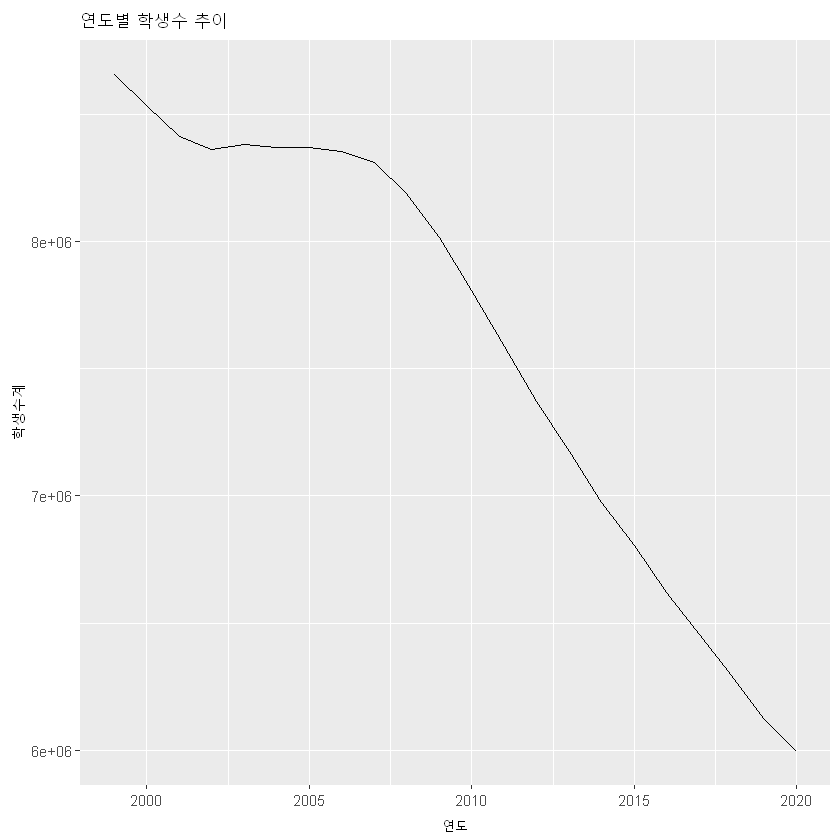

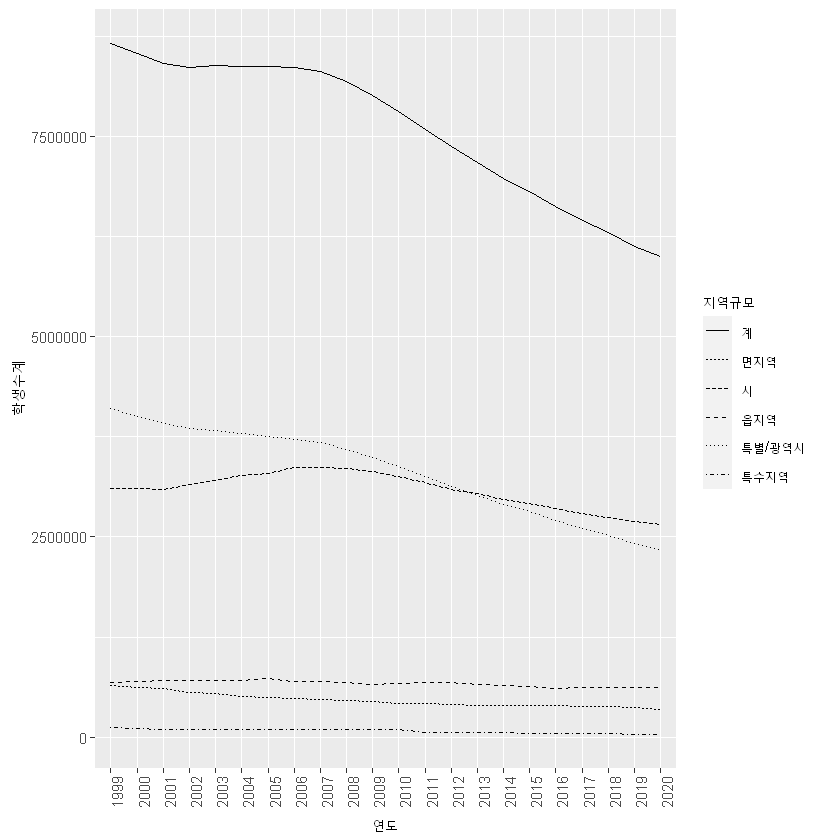

In [59]:
library(ggplot2)

head(students)

students %>%
    ggplot(aes(x = 연도, y = 학생수계)) + # x축에 바인딩할 students 데이터의 필드와 y축 바인딩 필드 지정
    geom_line(aes(group=1)) +
    labs(title = '연도별 학생수 추이')

# 다양한 선 그려보기

ggplot(data = students.all, aes(x = 연도, y = 학생수계)) +
    geom_line(aes(group = 지역규모, linetype = 지역규모)) +
    theme(axis.text.x = element_text(angle=90, hjust=1)) +
    labs(tiotle = '연도별 학생수 추이', x = '연도')



Forecast method: Mean

Model Information:
$mu
[1] 7598603

$mu.se
[1] 189914

$sd
[1] 890775.4

$bootstrap
[1] FALSE

$call
meanf(y = students.ts[, 2])

attr(,"class")
[1] "meanf"

Error measures:
                        ME     RMSE    MAE       MPE    MAPE     MASE      ACF1
Training set -1.694451e-10 870295.1 780669 -1.422719 10.7441 6.074563 0.8753895

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        7598603 6393450 8803757 5704501 9492706
2022        7598603 6393450 8803757 5704501 9492706
2023        7598603 6393450 8803757 5704501 9492706
2024        7598603 6393450 8803757 5704501 9492706
2025        7598603 6393450 8803757 5704501 9492706
2026        7598603 6393450 8803757 5704501 9492706
2027        7598603 6393450 8803757 5704501 9492706
2028        7598603 6393450 8803757 5704501 9492706
2029        7598603 6393450 8803757 5704501 9492706
2030        7598603 6393450 8803757 5704501 9492706


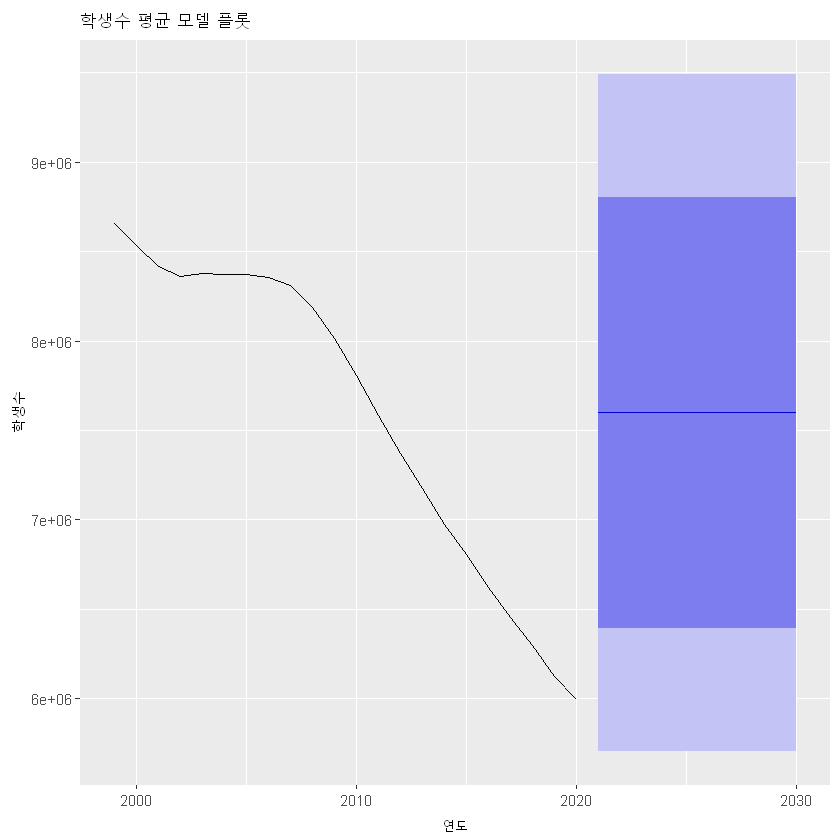

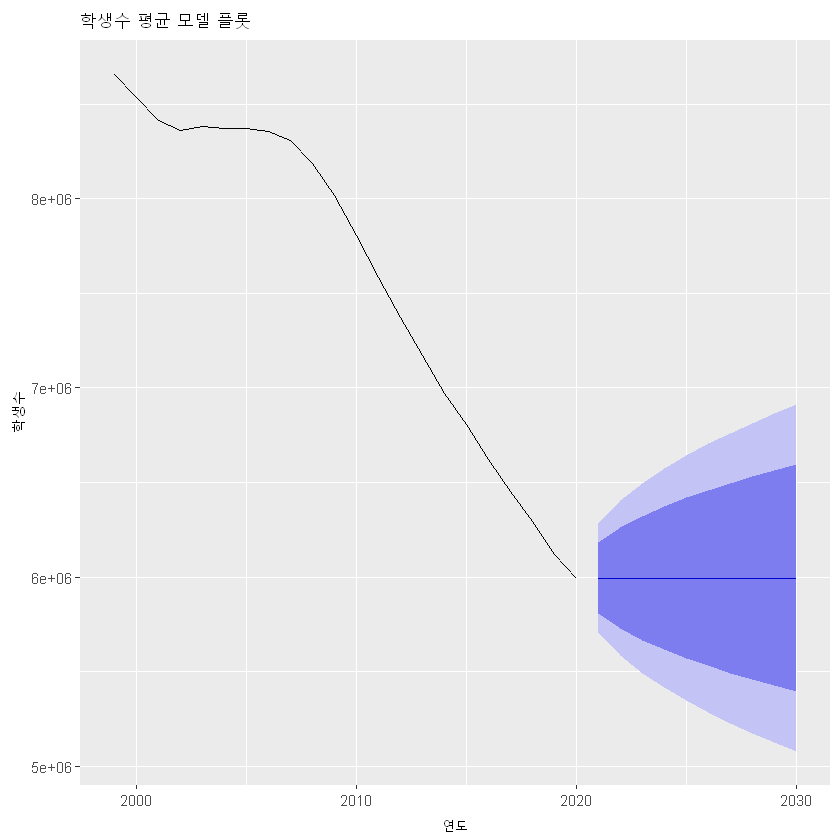

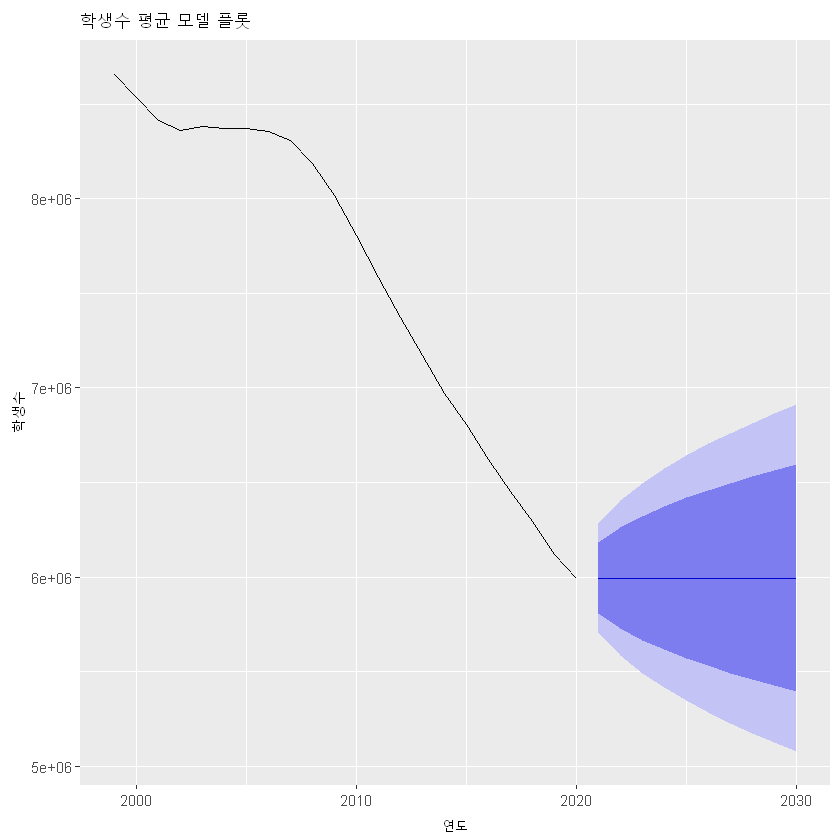

In [67]:
library(forecast)
# 평균 모델 => 전체 데이터의 평균값으로 예측
summary(meanf(students.ts[, 2]))

autoplot(meanf(students.ts[, 2]), main = '학생수 평균 모델 플롯', xlab = '연도', ylab = '학생수')

# 단순모델 => 데이터의 마지막 값이 미래에도 지속될 것이라는 가정 하에 예측

students.ts[, 2] %>% naive() %>% autoplot(main = '학생수 평균 모델 플롯', xlab = '연도', ylab = '학생수')

# 랜덤워크 모델
students.ts[, 2] %>% rwf() %>% autoplot(main = '학생수 평균 모델 플롯', xlab = '연도', ylab = '학생수')

In [1]:
# 회귀모델
library(forecast)

# 틸드 기호 오른쪽에 trend, season 키워드를 넣어주면 해당 특성을 반영하여 회귀 모델을 생성
student.ts.lm <- tslm(students.ts[, 2] ~ trend, data = students.ts)
summary(student.ts.lm)
student.ts.lm %>% forecast() %>% autoplot() + labs(title = '전체 학생수에 대한 시계열 선형 회귀 예측 결과', x = '연도', y = '학생수')

# 학생수 예측시에 유치원 학생수와 trend를 사용
student.ts.lm <- tslm(students.ts[, 4] ~ students.ts[, 3] + trend, data = students.ts)
student.ts.lm %>% forecast(h = 22) %>% autoplot() + labs(title = '전체 학생수에 대한 시계열 선형 회귀 예측 결과', x = '연도', y = '학생수')

ERROR: Error in library(forecast): there is no package called 'forecast'


         date       broker01        broker02     maxTransactionsPerSecond
 2021-11-01: 1   Min.   :  1.6   Min.   : 1.70   Min.   :  3.30          
 2021-11-02: 1   1st Qu.:  5.9   1st Qu.: 5.60   1st Qu.: 11.90          
 2021-11-03: 1   Median : 14.5   Median :20.60   Median : 47.00          
 2021-11-04: 1   Mean   : 21.3   Mean   :25.85   Mean   : 47.16          
 2021-11-05: 1   3rd Qu.: 26.0   3rd Qu.:47.30   3rd Qu.: 63.10          
 2021-11-06: 1   Max.   :138.2   Max.   :79.30   Max.   :158.80          
 (Other)   :19                                                           


Call:
tslm(formula = data.ts[, 4] ~ +trend, data = data.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.332 -23.754  -2.319  18.417  99.331 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  79.1710    14.0549   5.633 9.84e-06 ***
trend        -2.4627     0.9454  -2.605   0.0158 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.09 on 23 degrees of freedom
Multiple R-squared:  0.2278,	Adjusted R-squared:  0.1942 
F-statistic: 6.785 on 1 and 23 DF,  p-value: 0.01584


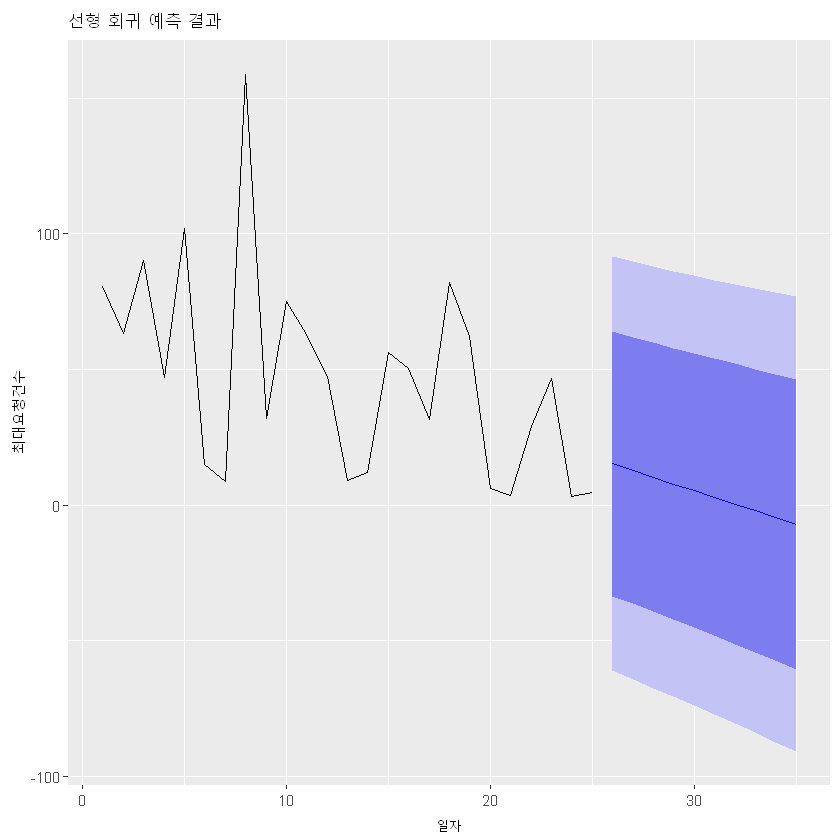

In [45]:
# 회귀모델
library(forecast)
library(xts)
library(tidyverse)

data <- read.csv("./data/test01.txt", header = TRUE, sep = "\t")

summary(data)

# students.ts <- ts(students, frequency = 1, start = 1999) # 연도별 시간값을 ts에 저장
# students.xts <- as.xts(students[, -1], order.by = students$`연도`) # 연도별 시간값을 ts에 저장

# 시계열 분석을 위한 데이터 객체로 변환
data$date2 <- as.Date(data$date)
# Date 객체로 들어간 필드를 반드시 order.by에 넣어주어야함
data.xts <- xts(data, order.by = data$date2)

data.ts <- as.ts(data.xts)

data.ts.lm <- tslm(data.ts[, 4] ~ + trend, data = data.ts)
summary(data.ts.lm)
data.ts.lm %>% forecast() %>% autoplot() + labs(title = '선형 회귀 예측 결과', x = '일자', y = '최대요청건수')


# # 틸드 기호 오른쪽에 trend, season 키워드를 넣어주면 해당 특성을 반영하여 회귀 모델을 생성
# student.ts.lm <- tslm(students.ts[, 2] ~ trend, data = students.ts)
# summary(student.ts.lm)
# student.ts.lm %>% forecast() %>% autoplot() + labs(title = '전체 학생수에 대한 시계열 선형 회귀 예측 결과', x = '연도', y = '학생수')

# # 학생수 예측시에 유치원 학생수와 trend를 사용
# student.ts.lm <- tslm(students.ts[, 4] ~ students.ts[, 3] + trend, data = students.ts)
# student.ts.lm %>% forecast(h = 22) %>% autoplot() + labs(title = '전체 학생수에 대한 시계열 선형 회귀 예측 결과', x = '연도', y = '학생수')